In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv('height-weight.csv')

In [6]:
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

Text(0, 0.5, 'Height')

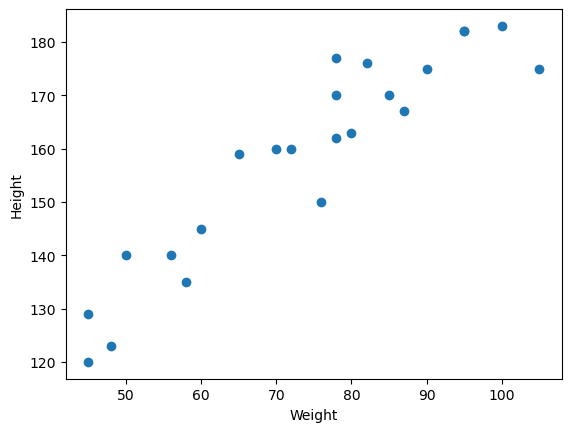

In [9]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [10]:
## correlation
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

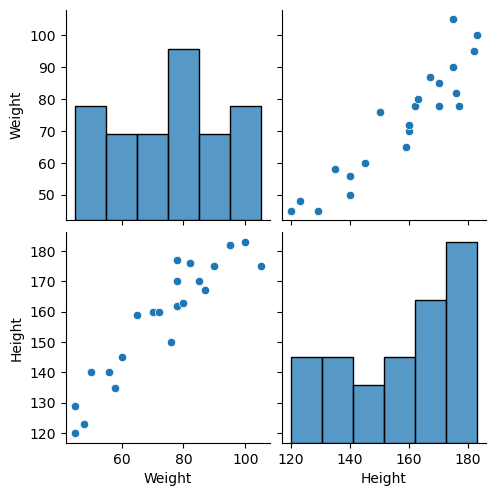

In [11]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [15]:
##divide our dataset into independent and dependent features
X=df[['Weight']] ##independent feature should be data frame or 2d array
##np.array(X).shape
y=df['Height'] ## this variable can be in series form or 1d array

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
## Apply Simple linear Regression
from sklearn.linear_model import LinearRegression

In [24]:
regressor=LinearRegression(n_jobs=-1)

In [25]:
regressor.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [27]:
regressor.coef_

array([17.03440872])

In [28]:
regressor.intercept_

157.5

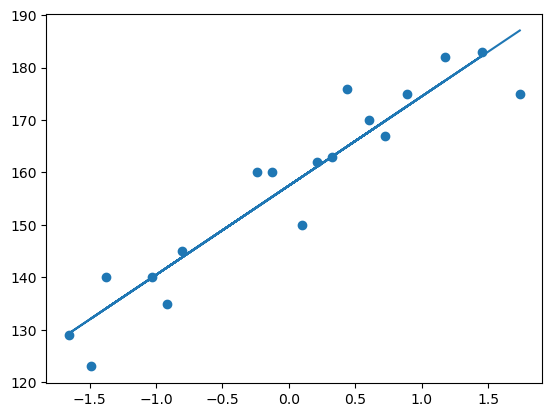

In [29]:
## plot training data plot best fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

##### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.0344(X_train)
   
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.0344(X_test)

In [30]:
## prediction for test data
y_pred_test=regressor.predict(X_test)

In [31]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [34]:
print(score)

0.7769869860423441


### R square
###### Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [35]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.7769869860423441


### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [36]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

# Using OLS

In [37]:
import statsmodels.api as sm

In [38]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 27 Jan 2025   Prob (F-statistic):                       0.661
Time:                        12:52:44   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
## prediction for new dat
regressor.predict(scaler.transform([[72]]))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])